# Chapter 1. Projection images

- Approximately how large is the molecule?

    About 6-8 $\overset{\circ}{\text{A}}$.

- Does this seem like a reasonable projection of the caffeine molecule?

    Of course!

- In what sense is a two dimensional plot of a three-dimensional function similar to a projection?

    As we have defined before, the two dimensional plot is an integral of the three-dimensional function along a single coordinate.

- Can you explain this?

    If you look at the **drawmol** function and compare the its parameters with the colors of the caffeine molecule, you will notice that the brighter spots are related to elements O and N (with O brighter than N), and the less brighter spots are related to element C. The reason is simply that the electronegativity order of these elements is O>N>C, therefore the ability to attract electrons is O>N>C. This explain the order of brightness shown in the density figure.

# Chapter 2. Diffraction concepts

- Draw a vector diagram illustrating the relationship between the incident wave, the wave scattered in some direction of your choice, and the scattering vector. Let all vectors have the same origin (i.e. keep their tails together). 

<img src="Scattering.png" style="width: 500px;" >

- If you keep the incident wave fixed and measure the scattered wave in all possible directions, the tip of scattering vector will span surface in Fourier space. What type of surface (geometrical shape)?

    Since the scattering is elastic, the scattering vector has the same length as the input wave vector, but can take any direction in space. Therefore $k_s$ forms a sphere in space.

- What happens to the size (radius) of the Ewald sphere as you increase/decrease the wavelength? Can you explain this in terms of the vectors you drew for the previous question?

    Since $|k_{\text{in}}| = |k_s| = 1 / \lambda$, when we double the wavelength, the length of the wavevector is therefore reduced by half, which means that the radius of the Ewald sphere is reduced by half.

- What happens if you decrease the resolution parameter while keeping the wavelength fixed?

    The relation between resolution and measure the scattered wave vector $k$ is that: $\text{resolution} = 1/|k|$. Therefore for large values of resolution (which means low resolution), only small values of $|k|$ is required which correspond to only part of the Ewald sphere. As we go to higher resolution, we need larger part of the sphere. The highest resolution we can get relates to the whole sphere, where $\text{resolution} = 1/|k_{\text{in}}| = \lambda/2$. This explains why we cannot set the resolution parameter lower than half of the input wavelength.

- How is the surface affected by the change in wavelength?

    The radius of the sphere is increasing when we decrease the wavelength. However, the solid angle of the Ewald sphere for a certain resolution is also decreasing. This is because the $k$ is restricted by resolution, which sets how much of a sphere is required.

- To record a projection image, what requirement must you place on the wavelength relative the resolution?

    Suppose we want to get an image with resolution $a$ of a 3D object, then we need to know all the values inside a sphere in the Fourier space with radius $k=1/a$. With a certain input wavelength, we need to change the direction of the input light so that we can probe different directions in the Fourier space. Eventually, with a certain resolution setting, we can cover all the points inside a sphere with raidus $k$. After we get this sphere, we can take slice of it to get a projection image. The requirement on the input wavelength $\lambda$ is $\lambda < 2a$.

- What does this say about the wavelength of the electrons used?

    This simply means that the wavelength of the electron can be around the order of a few $\overset{\circ}{\text{A}}$, or smaller than that.

# Chapter 3. Resolution

- What happens to the atoms in the projection? What is the smallest cut-off that you can use and still distinguish individual (separated) atoms?

    If we decrease the cut-off, the atoms start to be more blurred and smeared and eventually we cannot distinguish individual (separated) atoms. Based on the results below, roughly 0.5 is the critical cut-off value.

In [1]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

# add path to the Modules
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

from Projection import *

In [2]:
# Read the pdb file for caffeine molecule.
caf = Molecule('caffeine.pdb')

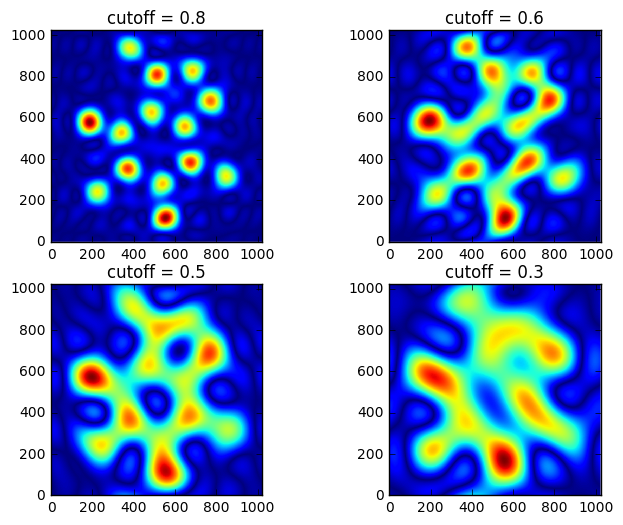

In [3]:
step = 1/8.
cutoff = [0.8, 0.6, 0.5, 0.3]

H, K, L = TwoD_grid(step, cutoff[0])
rho0 = fft.fftshift(abs(fft.ifftn(moltrans(caf, H,K,L), [2**10, 2**10])))

H, K, L = TwoD_grid(step, cutoff[1])
rho1 = fft.fftshift(abs(fft.ifftn(moltrans(caf, H,K,L), [2**10, 2**10])))

H, K, L = TwoD_grid(step, cutoff[2])
rho2 = fft.fftshift(abs(fft.ifftn(moltrans(caf, H,K,L), [2**10, 2**10])))

H, K, L = TwoD_grid(step, cutoff[3])
rho3 = fft.fftshift(abs(fft.ifftn(moltrans(caf, H,K,L), [2**10, 2**10])))

fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(rho0, interpolation='none',origin='lower')
ax[0,0].set_title('cutoff = ' + str(cutoff[0]))
ax[0,1].imshow(rho1, interpolation='none',origin='lower')
ax[0,1].set_title('cutoff = ' + str(cutoff[1]))
ax[1,0].imshow(rho2, interpolation='none',origin='lower')
ax[1,0].set_title('cutoff = ' + str(cutoff[2]))
ax[1,1].imshow(rho3, interpolation='none',origin='lower')
ax[1,1].set_title('cutoff = ' + str(cutoff[3]))

- Do you see what the relationship is between the maximum scattering vector and the cut-off variable? What is then the resolution you need to distinguish individual atoms?

    The length of the maximum scattering vector is exactly the cut-off. The resolution is roughly the inverse of the cut-off. Therefore at the critical cut-off 0.5, the resolution is about 2 $\overset{\circ}{\text{A}}$, which indicates that we cannot know more details under this length scale and therefore the atoms start to be indistinguishable.

- Do you see that the right-hand side of two equations are equivalent?

    By definition, $k_{\text{in}} = 1/\lambda$.

- What does $k_{\text{max}}$  correspond to in the planes that you created when calculating projections? In terms of the variables you used when creating projections, what is the resolution of the projections?

    $k_{\text{max}}$ is just the cut-off we use. Therefore with cut-off to be 5, the resolution is 1/5=0.2$\overset{\circ}{\text{A}}$.

- What is the relationship between the size of the cut-off in Fourier space, the width of the main lobe of the sinc function and what we call resolution?

    The width of the main lobe of the sinc function $d$ can be estimated as $d = 1/\text{cutoff}$. Since the sinc function basically smear the real space image, therefore the resolution is roughly just the width of the sinc function $d$.

# Chapter 4. A look at 3D reconstructions

- Why is this?

    Because Gaussian window decays monotonically when $x$ goes to $\pm \infty$ and therefore doesn't have the side lobes.

- What physical quantity does the sum represent? Can you explain why?

    The value that the molecular transform takes at the origin and the sum of the electron density both represent the total number of electrons in the molecules (which is 92 for caffeine molecule).

# Chapter 5. Sampling, periodicity and crystals

- What happens as you decrease the step size?

    The molecule becomes more blurred and larger and eventually more bright spots start show up.

- Do you now see why you used the default sampling step of 1/8 for the caffeine molecule?

    Because the max length of the caffeine molecule in one direction is roughly 8$\overset{\circ}{\text{A}}$. Therefore if we choose sampling step of 1/8, the period of the repeat in real space is 8$\overset{\circ}{\text{A}}$, which is roughly enough to reconstruct the molecule without too much overlap.

- By reversing the above argument, can you explain why a crystalline diffraction pattern is discrete rather than continuous (the so-called Bragg peaks)? What property of the unit cell determines the spacing between the Bragg peaks?

    A crystal has spatial transilational symmetry and therefore can be described as a sha function. The diffraction pattern is the Fourier transform of it, which is also a sha function. This explain why we get Bragg peaks in crystalline diffraction.

# Chapter 6. Phase retrieval

- Based on this, why did you use a sampling step size of 1/16 instead of 1/8?

    As we know, the autocorrelation is the convolution of the electron density with itself, which is non-zero in an area that is twice the area in which electron density is non-zero. Therefore, based on what we learn in Chapter 5, the critical sampling step in Fourier space need to create a 'box' in real space that is roughly the same size of autocorrelation. Since the molecule is about 8$\overset{\circ}{\text{A}}$, the autocorrelation is about 8$\overset{\circ}{\text{A}}$ and therefore require a sampling step size of 1/16.

- Why is it useful to have an algorithm that converges with the autocorrelation of the density as a support?

    Because that's what we can measure in actuall experiment! Usually we can only record the intensity and this autocorrelation is the only information we have, therefore an algorithm that converges with autocorrelation of the density as a support is quite useful.